## Introduction

This project will investigate if there is a correlation between the GDP of a country and Life Expectancy at Birth of its citizens. 
The goals are to prepare the data, follwoed by analysis with plots, and seek to explain the findings in the study.
Here are a few questions that this study will seek to answer:
* Has life expectancy increased over time in the studied countries?
* Has GDP increased over time in the studied countries?
* Is there a correlation between GDP and Life Expectancy of a country?
* What is the average life expectancy in the studied countries?
* What is the distribution of life expectancy?

**Data Sources**

- [Codecademy](https://www.codecademy.com/)'s Data Analyst Career Path

## Import Python Modules

First import the preliminary modules to be used in this project:

In [1]:
# import libriaries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline 

## Loading the data

To look for connections between GDP and Life Expectancy, we grab the data and in load in a DataFrame for visualization.

Here **all_data.csv** will be saved in a frame named `df`, which data we'll check by using `sample` to get a random sample of 10 rows.   

In [2]:
# render the dataframe
df = pd.read_csv('all_data.csv')
df.sample(10)

,Country,Year,Life expectancy at birth (years),GDP
81,Zimbabwe,2001,45.3,6.777385e+09
68,United States of America,2004,77.5,1.230000e+13
45,Germany,2013,80.6,3.752510e+12
21,China,2005,73.9,2.285970e+12
88,Zimbabwe,2008,48.2,4.415703e+09
25,China,2009,74.9,5.109950e+12
58,Mexico,2010,75.6,1.051130e+12
10,Chile,2010,79.1,2.185380e+11
83,Zimbabwe,2003,44.5,5.727592e+09
95,Zimbabwe,2015,60.7,1.630467e+10


Another check of the shape of `df` is performed. It seems that there are 96 observations or rows and 4 columns. 

In [3]:
df.shape

(96, 4)

## Explore the Data

First, we explore which are the countries represented in `df`. There seems to be six countries, Chile, China, Germany, Mexico, the US, and Zimbabwe represented in the data.

In [4]:
# check for unique values in Country
df.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

As a next step, we find out which years are represented in the data, and they are 2000-2015.

In [5]:
df.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

#### Cleaning Column Name

Looking over the data, we found inconsistencies with the column names. For example, the first two column names are one word each, while the third is five words long! `Life expectancy at birth (years)` is very descriptive, which is good for labeling the axis, but difficult to work on with. By using the `rename` function, we change the column name to `Life_Exp`.

In [6]:
# renaming the Life Expectancy column for ease of use.
df = df.rename(columns={'Life expectancy at birth (years)':'Life_Exp'})
df.head()

,Country,Year,Life_Exp,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


#### Exploratory Plots

Exploring data through plots can sometimes be much more effective. 
Following we examine `GDP` the distribution, where data appear to be very right skewed since most of the values are on the left-hand side. This type of distribution could be described as a power law distribution, which is a common enough distribution that it has its own name (or as 80/20 rule). More about the power law can be read [here](https://en.wikipedia.org/wiki/Power_law). 

c:\Users\dmaraku\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

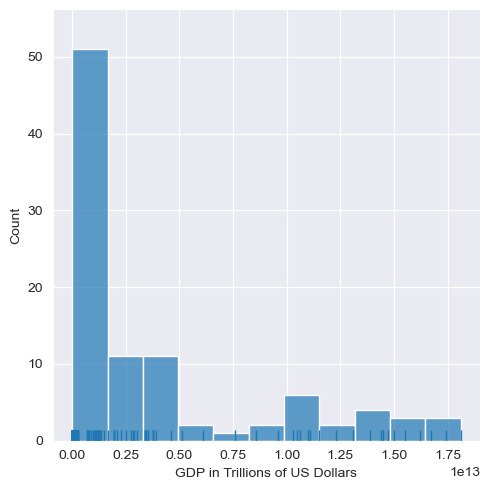

In [7]:
plt.figure(figsize=(8,6))
sns.displot(df.GDP, rug=True, kind='hist', alpha=0.7)
plt.xlabel('GDP in Trillions of US Dollars')
plt.show()
plt.close()

As a next step we examine `Life_Exp` distribution, resulting in the data distribution being very left skewed, since most of the values are on the right-hand side. This is almost the opposite of what was observed in the `GDP` column. A further look might also identify different modes or smaller groupings of distributions within the range.

c:\Users\dmaraku\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

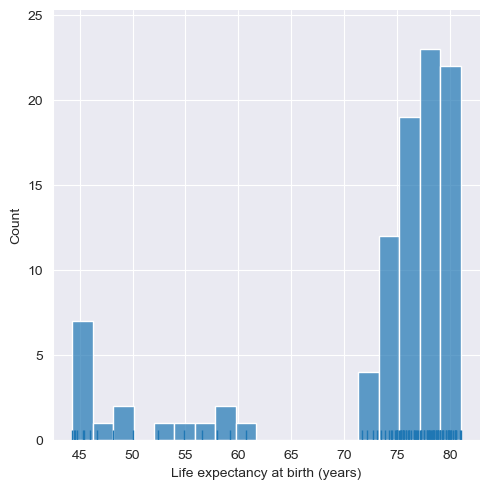

In [22]:
plt.figure(figsize=(8,6))
sns.displot(df.Life_Exp, rug=True, kind='hist', alpha=0.7)
plt.xlabel('Life expectancy at birth (years)')
plt.show()
plt.close()

In previous plots we didn't break data by countries, so as a next step we'll plot GD and Life Exp mean by country.  

In [23]:
dfMean = df.drop('Year', axis=1).groupby('Country').mean().reset_index()
dfMean

,Country,Life_Exp,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


Now that we've broken data by `Country` and the average values for `Life_Exp` and `GDP` are generated, we create the bar plots showing the mean values for each variable. 

The first plot is Life Expectancy.

All countries except for Zimbabwe have values in the mid-to-high 70s. This probably explains the skew in the distribution from before!

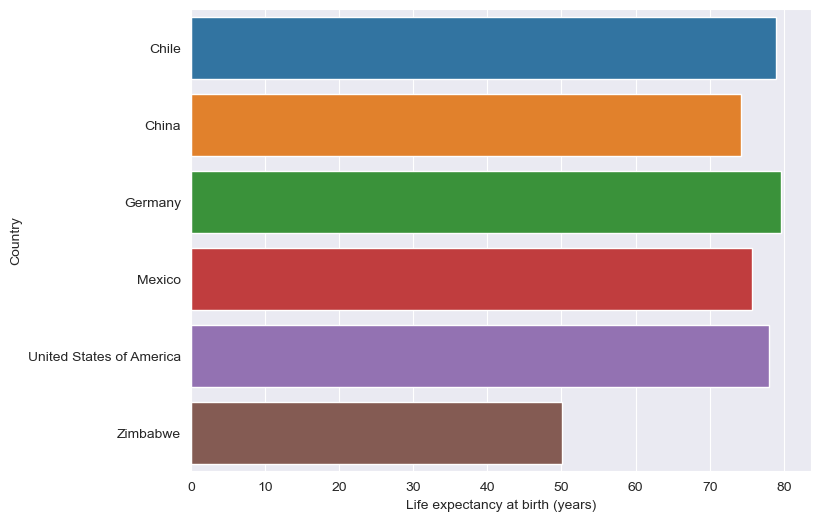

In [38]:
plt.figure(figsize=(8,6))
sns.barplot(data=dfMean, x='Life_Exp', y='Country')
plt.xlabel('Life expectancy at birth (years)')
plt.show()
plt.close()

Considering average `GDP` by `Country` it seems that the value for US is highest among other countries, followed by China and Germany. If we'd plot the data scaled linear (shown as logarithmic instead) on the X axes, Zimbabwe will not even be visible while Chile w'd be just barely seen. In comparison the USA has a huge GDP compared to the rest. China, Germany and Mexico seem to be relatively close in figures.

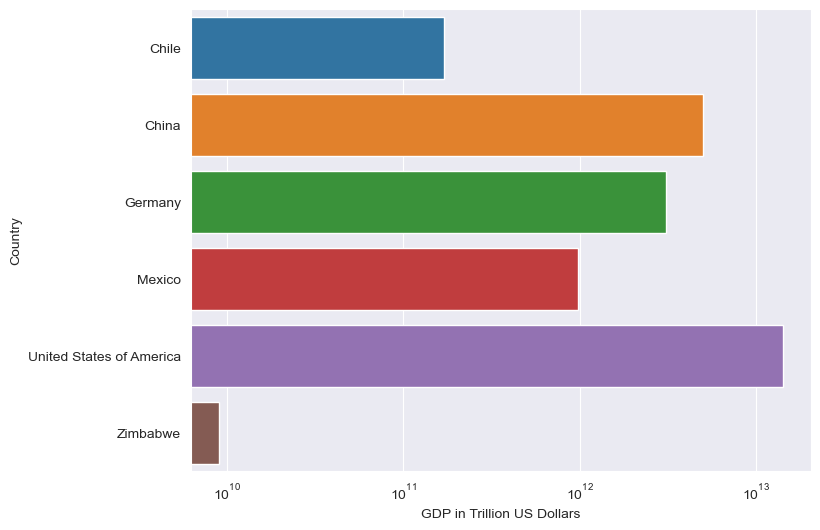

In [51]:
plt.figure(figsize=(8,6))
sns.barplot(data=dfMean, x='GDP', y='Country')
plt.xlabel('GDP in Trillion US Dollars')
plt.xscale('log') #'linear', 'log',
plt.show()
plt.close()


#### Violin Plots

Another way to compare data is to visualize the distributions of each and to look for patterns in the shapes.

The violin plot is a popular choice because it can show the shape of the distribution compared to the box plot. Below, country is on the x-axis and the distribution of numeric columns : `GDP` and `Life_Exp` are on the y axis. 

In the `GDP` plot on the left, China and the US have a relatively wide range, where Zimbabwe, Chile, and Mexico have shorter ranges. 

In the `Life_Exp` plot, many of the countries have shorter ranges except for Zimbabwe which has a range spanning from the high 30s to the high 60s.

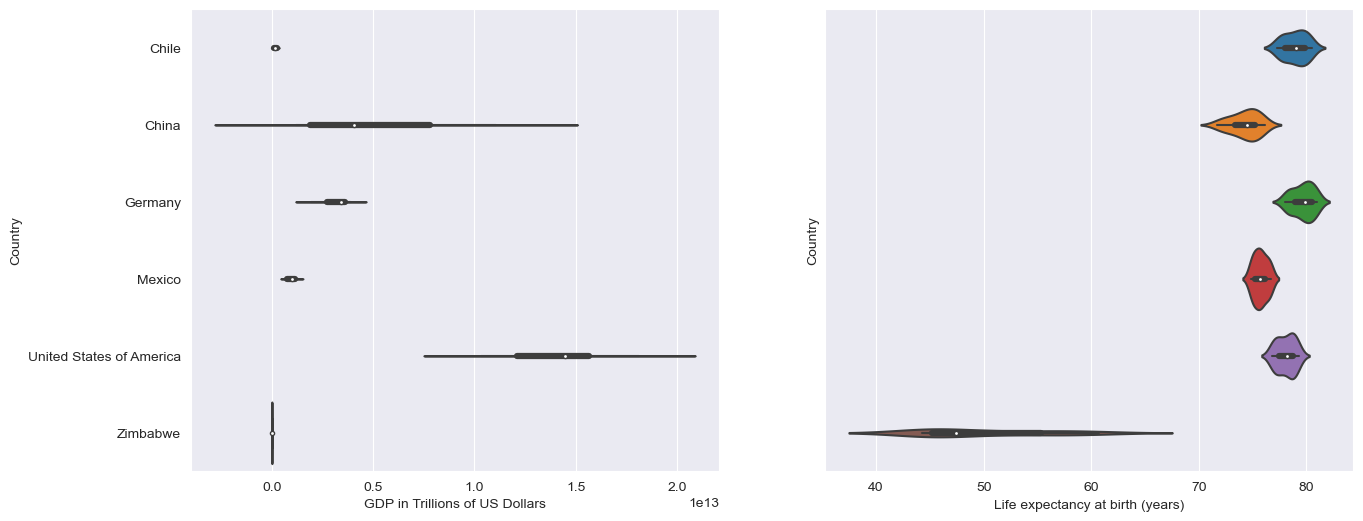

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(15,6), sharey=True)
axes[0] = sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel('GDP in Trillions of US Dollars') 
axes[1] = sns.violinplot(ax=axes[1], x=df.Life_Exp, y=df.Country)
axes[1].set_xlabel('Life expectancy at birth (years)')
plt.show()
plt.close()

#### Swarm Plots

Another method for showing distributions is the swarm plot, which can be used to complement the box and violin plots. First the stand alone swarm plot is shown and then overlayed on top of a violin plot. Swarm plots are useful because they show dot density around the values as well as distribution through area/shape. 

In the case of of the `GDP` plot on the left, Chile and Zimbabwe have a vertical line of dots that illustrate the number of data points that fall around their values. This detail would have been lost in the box plot, unless the reader is very adept at data visualizations. 

c:\Users\dmaraku\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 43.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\dmaraku\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 43.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\dmaraku\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


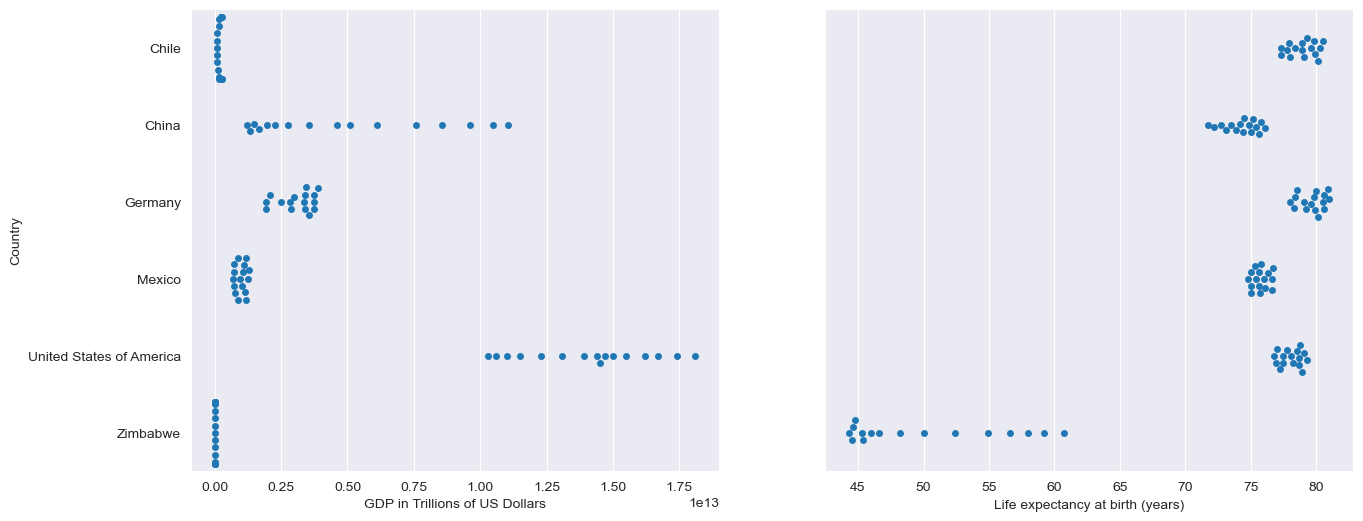

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(15,6), sharey=True)
axes[0] = sns.swarmplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel('GDP in Trillions of US Dollars') 
axes[1] = sns.swarmplot(ax=axes[1], x=df.Life_Exp, y=df.Country)
axes[1].set_xlabel('Life expectancy at birth (years)')
plt.show()
plt.close()

In [24]:
# df[df.Year.isin([2000, 2015])]

In [25]:
# # generate statistics for each country
# for i in range(df.Country.nunique()):
#     print(f"Statistics for {df.Country.unique()[i]}:")
#     # print(df[df.Country == df.Country.unique()[i]].describe())
#     # generate the change in % of GDP and Life Exp between 2015 and 2000
#     GDP_2015 = df[df.Country == df.Country.unique()[i]].GDP[df.Year == 2015].tolist()[0]
#     GDP_2000 = df[df.Country == df.Country.unique()[i]].GDP[df.Year == 2000].tolist()[0]
#     GDP_change = (GDP_2015 / GDP_2000) - 1
#     Life_Exp_2015 = df[df.Country == df.Country.unique()[i]].Life_Exp[df.Year == 2015].tolist()[0] 
#     Life_Exp_2000 = df[df.Country == df.Country.unique()[i]].Life_Exp[df.Year == 2000].tolist()[0] 
#     Life_Exp_change = (Life_Exp_2015 / Life_Exp_2000) - 1
#     print(f"GDP for {df.Country.unique()[i]} from 2000 to 2015 {'increased' if GDP_change > 0 else 'decreased'} by {(GDP_change * 100):.1f}%.") 
#     print(f"Life Expectancy for {df.Country.unique()[i]} from 2000 to 2015 {'increased' if Life_Exp_change > 0 else 'decreased'} by {(Life_Exp_change * 100):.1f}%.")
#     if i != df.Country.nunique()-1:
#         print('===========================')

In this analysis, latest values for Life_Exp and GDP are compared to respective ones at the starting period in order to generate change ratios. As shown in the reported analysis, both parameters have increased for all countries, obviously at different rates. 
In terms of GDP, China shows a significant growth rate at 813%, while Mexico seems to have grown the least with 69%.
In terms of Life Expectancy rates, Zimbabwe seems to have increased significantly, at 32%, while Mecxico still holds the least growing ratio in this category as well, but it is to say that all other countries are within 3%-6% increase rates. 

### Countries GDP by Year

In [26]:
# plot countries gpd by year
# plt.figure(figsize=(8,4)) 
# sns.lineplot(x='Year', y='GDP', data=df, hue='Country', lw=2)
# plt.yscale('log')
# plt.title("Countries GDP by Year");
# plt.show()
# plt.close()

The above plot shows that GDP is growing at higher rate in USA and China, where it has trippled over the years, and at a slower rate in other countries.

### Countries Life Expectancy by Year

In [27]:
# plot life expectancy by year
# plt.figure(figsize=(8,4)) 
# sns.lineplot(x='Year', y='Life_Exp', data=df, hue='Country', lw=2)
# plt.title("Countries Life Expectancy by Year")
# plt.show()
# plt.close()

As shown in the the above plot, its Germany who leads the Life Expectancy with numbers being above 80 yrs old, followed closely by Chile and USA. While quite all countries show for Life Expectancy to have increased over the years at a steady rate, it's Zimbabwe the one showing has the highest rate of increased life expectancy, however, quite far behind from the life expectancy numebers shown in other analysed countries.

### Life Expectancy to GDP Correlation

In [28]:
# plt.figure(figsize=(8,4))
# sns.scatterplot(x='Life_Exp', y='GDP', data=df, hue='Country'); 
# plt.yscale('log')
# plt.title('Life Exp to GDP Correlation')
# plt.show()
# plt.close()

As shon in the plote, while most countries with the exceptance of Zimbabwe show similar increasing pace in Life Expectancy, regarding GDP its China to have grwon faster than other countries since it has more than quadrippled in value, overpassing Germany and getting closer to USA. On the other hand, Zimbabwe shows a steep increase in Life Expectancy while a slower rate in GDP grwoth, due to its highly unstable economy affected also by hyperinflation.   

In [29]:
# df.groupby('Country')[['Life_Exp', 'GDP']].corr()

In addition to the above plot the shown frame points out the existance of a postive correlation between GDP and Life_Exp for all countries, with all of them having respective correlation coefficients quite close to 1. 

### Average Life Expectancy by Country

In [30]:
# generate and plot average life expetncy by country
# pivot_tab = df.pivot(index='Year', columns="Country", values='Life_Exp')
# sns.barplot(pivot_tab)
# plt.title("Avg. Life Expectancy by Country")
# plt.ylabel('Life Exp. (Yrs)')
# plt.xticks(rotation=15); 
# plt.show()
# plt.close()

# df.groupby("Country").Life_Exp.mean().rename('Avg_Life_Exp').to_frame()

This plot shows Germany having the highest average of Life Expecatancy of its population, while Zimbabwe standing on a lower average, mainly attributed to its political, social and economic instability faced by the country during the analysed period.

In [31]:
# sns.displot(data= df, y='Life_Exp', hue='Country', kind='ecdf', rug=True)
# sns.displot(data= df, x='Life_Exp', hue='Country', kind='hist', rug=True)
# plt.show()
# plt.close()

The above plots show Life Expectancy's proportionality of the population in each country during the analysed period. 

### Changes of GDP and Life_Exp data over the years

In [32]:
# create yearly fluctution colummns for GDP and life Exp
# df['GDP_Fluct'] = df.GDP.apply(lambda x: 0 if df.loc[df.GDP == x].index[0] in df.GDP[df.Year == 2000].index \
#                                else (x/df.GDP[(df[df.GDP == x].index[0])-1]-1)*100)
# df['Life_Exp_Fluct'] = df.Life_Exp.apply(lambda x: 0 if df.loc[df.Life_Exp == x].index[0] in df.Life_Exp[df.Year == 2000].index \
#                                          else (x/df.Life_Exp[(df[df.Life_Exp == x].index[0])-1]-1)*100)

# df.head()

Created a new colum for each parameter to make an evidence of respective yearly change and added them to the dataframe. 

In [33]:
# plt.figure(figsize=(8,4)) 
# sns.lineplot(data = df, x='Year', y='GDP_Fluct', hue='Country', lw=2);
# plt.title('Yearly GDP changes by country')
# plt.show()
# plt.close()


Plotted yearly GDP changes in % for each country. USA seems to have a steadier pace of growth, while other countries occilate, with Zimbabwe showing a steep increase in 2009 effected by currency revalution due to the hyperinflation occuring in the country at that period. 

In [34]:
# plt.figure(figsize=(8,4)) 
# sns.lineplot(data = df, x='Year', y='Life_Exp_Fluct', hue='Country',lw=2)
# plt.title('Yearly Life Expectancy changes by country')
# plt.show()
# plt.close()

Plotted yearly Life Expectancy changes in % for each country. Most countries seem to have valeus aroung their analysed period average, while Zimbabwe is the one to have changed the most. 